In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("PWD ",os.getcwd())

# Read data

schedule04normal = pd.read_csv("datalad-slurm-test-09_2025-03-29T174949+0100_with_4+0_out_args/timing_schedule.txt", delimiter=" " )
schedule04slurm  = pd.read_csv("datalad-slurm-test-09_2025-03-29T174949+0100_with_4+0_out_args/timing_slurm.txt", delimiter=" " )
schedule04altdir = pd.read_csv("datalad-slurm-test-09_2025-03-29T174949+0100_with_4+0_out_args/timing_schedule_alt.txt", delimiter=" " )

schedule08normal = pd.read_csv("datalad-slurm-test-09_2025-03-23T141631+0100_with_4+4_out_args/timing_schedule.txt", delimiter=" " )
schedule08slurm  = pd.read_csv("datalad-slurm-test-09_2025-03-23T141631+0100_with_4+4_out_args/timing_slurm.txt", delimiter=" " )
schedule08altdir = pd.read_csv("datalad-slurm-test-09_2025-03-23T141631+0100_with_4+4_out_args/timing_schedule_alt.txt", delimiter=" " )

schedule12normal = pd.read_csv("datalad-slurm-test-09_2025-03-28T090920+0100_with_4+8_out_args/timing_schedule.txt", delimiter=" " )
schedule12slurm  = pd.read_csv("datalad-slurm-test-09_2025-03-28T090920+0100_with_4+8_out_args/timing_slurm.txt", delimiter=" " )
schedule12altdir = pd.read_csv("datalad-slurm-test-09_2025-03-28T090920+0100_with_4+8_out_args/timing_schedule_alt.txt", delimiter=" " )

schedule04normal= schedule04normal[schedule04normal['num_jobs']<=10000]
schedule04slurm=  schedule04slurm[schedule04slurm['num_jobs']<=10000]
schedule04altdir= schedule04altdir[schedule04altdir['num_jobs']<=10000]
schedule08normal= schedule08normal[schedule08normal['num_jobs']<=10000]
schedule08slurm=  schedule08slurm[schedule08slurm['num_jobs']<=10000]
schedule08altdir= schedule08altdir[schedule08altdir['num_jobs']<=10000]
schedule12normal= schedule12normal[schedule12normal['num_jobs']<=10000]
schedule12slurm=  schedule12slurm[schedule12slurm['num_jobs']<=10000]
schedule12altdir= schedule12altdir[schedule12altdir['num_jobs']<=10000]

dfs_datalad= [ 
    schedule04normal, schedule04altdir, 
    schedule08normal, schedule08altdir, 
    schedule12normal, schedule12altdir, ]

dfs_datalad_names= [
    "4 outputs", "4 outputs with --alt-dir",
    "8 outputs", "8 outputs with --alt-dir",
    "12 outputs", "12 outputs with --alt-dir",]

dfs_slurm= [ 
    schedule04slurm, 
    schedule08slurm, 
    schedule12slurm ]
dfs_slurm_names= [ "pure Slurm" ]


PWD  /home/knue/prog/datalad-slurm.git/runtime-evaluation


In [2]:

win= 100

for df in [*dfs_datalad,*dfs_slurm]:
#    df["rollingavg"]= df["time"].rolling(win,win_type ='triang').mean()
    df["rollingavg"]= df["time"].rolling(win).mean()
    df["rollingmin"]= df["time"].rolling(win).min()

    df.loc[0:win,"rollingavg"]= df.loc[0:win,"time"].mean()
    df.loc[0:win,"rollingmin"]= df.loc[0:win,"time"].min()

    # print("Sum over 'time' column: ", df["time"][win:].sum())
    # print("Sum over 'rollingavg' column: ", df["rollingavg"][win:].sum()) ## may differ slightly because the first 100 values are NaN
    # print("Sum over 'rollingmin' column: ", df["rollingmin"][win:].sum())
    print("Max in column: ", df["time"].max())


Max in column:  10.55
Max in column:  10.5
Max in column:  10.37
Max in column:  10.38
Max in column:  10.68
Max in column:  10.59
Max in column:  10.02
Max in column:  10.02
Max in column:  10.02


6


Text(0, 0.5, 'time [s]')

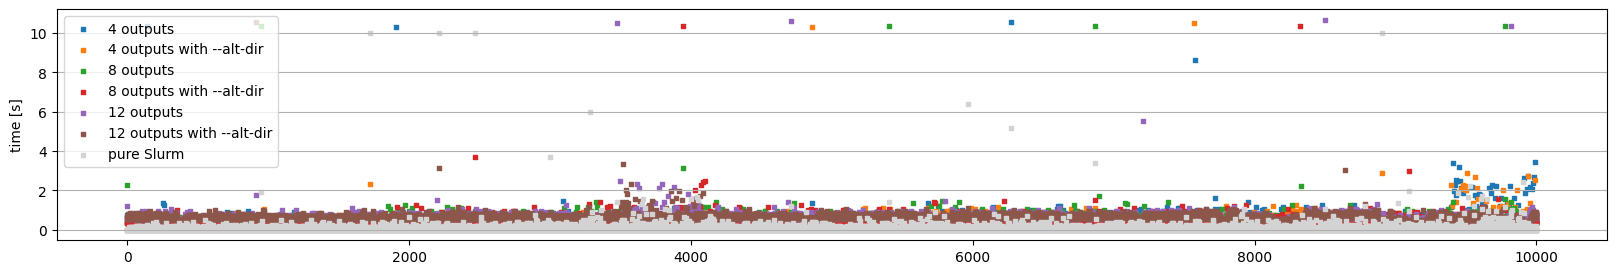

In [3]:
# Scatter plot for all timing values -- with outliers > 20

fig, ax = plt.subplots(figsize=(20, 3))

print(len(dfs_datalad))

for df in dfs_datalad:
    ax.scatter(x=df["num_jobs"],y=df["time"],marker=',',s=8)

for df in dfs_slurm:
    ax.scatter(x=df["num_jobs"],y=df["time"],marker=',',s=8, color='lightgray')


#ax.set_xlim(0,10000)
#ax.set_ylim(0,5)


#plt.legend(dfnames, loc='upper right')
plt.legend(dfs_datalad_names+dfs_slurm_names, loc='upper left')
plt.grid(axis = 'y')
#plt.title("Time for datalad schedule commands")
#plt.xlabel("Number of currently scheduled jobs")
plt.ylabel("time [s]")


6


Text(0, 0.5, 'time [s]')

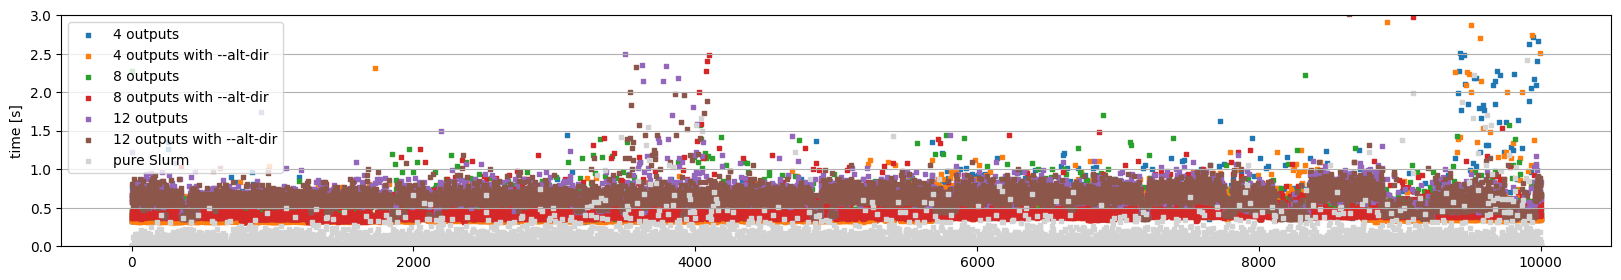

In [4]:
# Scatter plot for all timing values -- cut at y=3.0 -- use for the paper
 
fig, ax = plt.subplots(figsize=(20, 3))

print(len(dfs_datalad))

for df in dfs_datalad:
    ax.scatter(x=df["num_jobs"],y=df["time"],marker=',',s=8)

for df in dfs_slurm:
    ax.scatter(x=df["num_jobs"],y=df["time"],marker=',',s=8, color='lightgray')


#ax.set_xlim(0,10000)
ax.set_ylim(0,3)


#plt.legend(dfnames, loc='upper right')
plt.legend(dfs_datalad_names+dfs_slurm_names, loc='upper left')
plt.grid(axis = 'y')
#plt.title("Time for datalad schedule commands")
# plt.xlabel("Number of currently scheduled jobs")
plt.ylabel("time [s]")


Text(0, 0.5, 'time [s]')

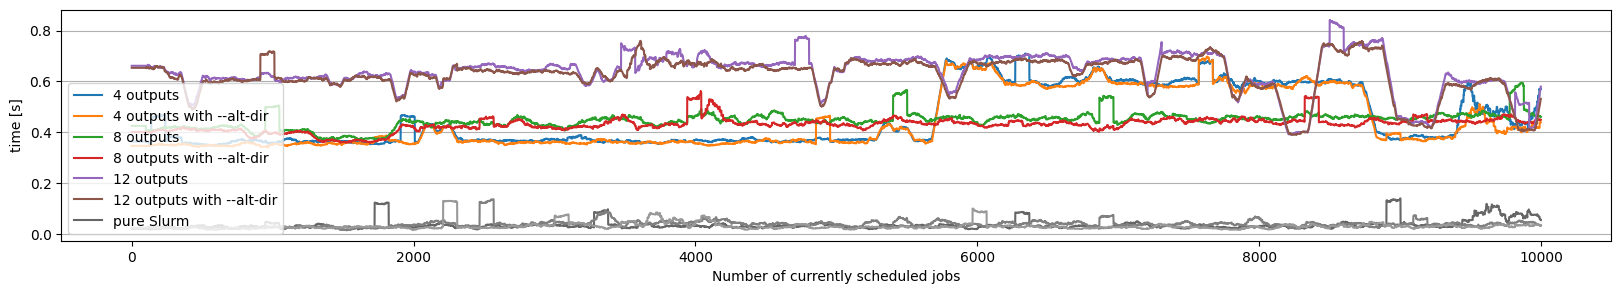

In [5]:
# Plots with rolling averages


cycle= plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ax = plt.subplots(figsize=(20, 3))

for df in dfs_datalad:
    ax.plot(df["rollingavg"])

c=0.4 #levels 0f gray
for df in dfs_slurm:
    ax.plot(df["rollingavg"], color=(c,c,c))
    c += 0.1

# for i in range(len(dfs_datalad)):
#     ax.plot(dfs_datalad[i]["rollingmin"], color=cycle[i], linestyle='dotted' )


#ax.set_xlim(0,10000)
#ax.set_ylim(0,1.5)

plt.legend(dfs_datalad_names+dfs_slurm_names, loc='lower left')
plt.grid(axis = 'y')
#plt.title("Rolling Avg")
#plt.title("Rolling average of time for datalad schedule commands")
plt.xlabel("Number of currently scheduled jobs")
plt.ylabel("time [s]")


## Fit to rolling avg.

Text(0, 0.5, 'time [s]')

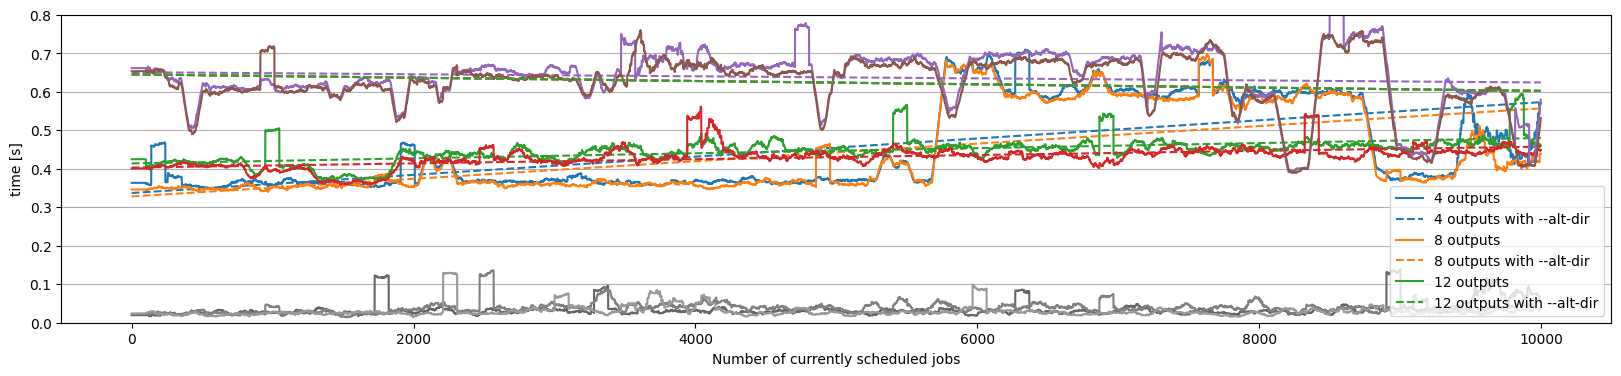

In [6]:
# Plots with rolling averages -- use for the paper

fig, ax = plt.subplots(figsize=(20, 4))

c=0.2 #levels 0f gray
for i in range(len(dfs_datalad)):

    df=dfs_datalad[i]

    from sklearn.linear_model import LinearRegression
    Y = df["rollingavg"].to_numpy()  # -1 means that calculate the dimension of rows, but have 1 column
    YY = df["time"].to_numpy()
    length= len(Y)

    X = np.arange(length, dtype=float).reshape((length, 1))
    Y=Y.reshape((length, 1))

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    Y_pred = linear_regressor.predict(X)  # make predictions

    ## plot


    ax.plot(df["rollingavg"], color=cycle[i] )
    ax.plot(Y_pred, color=cycle[i], linestyle='dashed' )


c=0.4 #levels 0f gray
for i in range(len(dfs_slurm)):

    dfs=dfs_slurm[i]

    ax.plot(dfs["rollingavg"], color=(c,c,c))
    c += 0.1

    ax.plot(Y_pred, color=cycle[i], linestyle='dashed' )


#ax.set_xlim(0,10000)
ax.set_ylim(0.0,0.8)

plt.legend(dfs_datalad_names)
plt.grid(axis = 'y')

plt.xlabel("Number of currently scheduled jobs")
plt.ylabel("time [s]")


Text(0, 0.5, 'time [s]')

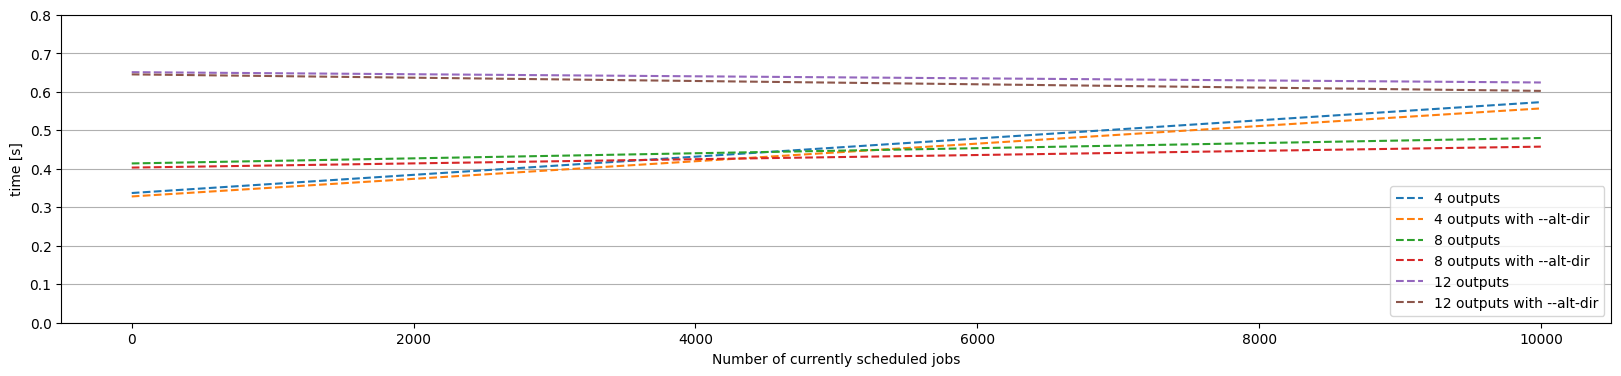

In [7]:
# Plots with rolling averages -- use for the paper

fig, ax = plt.subplots(figsize=(20, 4))

for i in range(len(dfs_datalad)):

    df=dfs_datalad[i]

    from sklearn.linear_model import LinearRegression
    Y = df["rollingavg"].to_numpy()  # -1 means that calculate the dimension of rows, but have 1 column
    YY = df["time"].to_numpy()
    length= len(Y)

    X = np.arange(length, dtype=float).reshape((length, 1))
    Y=Y.reshape((length, 1))

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    Y_pred = linear_regressor.predict(X)  # make predictions

    ## plot

    ax.plot(Y_pred, color=cycle[i], linestyle='dashed' )


#ax.set_xlim(0,10000)
ax.set_ylim(0.0,0.8)

plt.legend(dfs_datalad_names)
plt.grid(axis = 'y')

plt.xlabel("Number of currently scheduled jobs")
plt.ylabel("time [s]")


## Histogram with lin x-axis

Text(0.5, 0, 'time [s]')

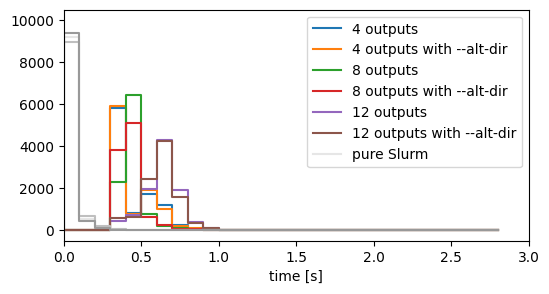

In [8]:
# histograms -- use for paper

w= 0.0
bins= [0]
while w <= 3.0:
    bins.append(w)
    w += 0.1

#print("bins:", bins)

fig, ax = plt.subplots(figsize=(6, 3))



for i in range(len(dfs_datalad)):

    df=dfs_datalad[i]

    heights, bins = np.histogram(df['time'], bins= bins)
    ax.step(bins[:-1], heights,where='post')


# slurm directly

c=0.9 #levels 0f gray
for i in range(len(dfs_slurm)):

    df=dfs_slurm[i]

    heights, bins = np.histogram(df['time'], bins= bins)

    ax.step(bins[:-1], heights, where='post',color=(c,c,c))
    c -= 0.15

#ax.set_xscale('log')
ax.set_xlim(0.0,3.0)
ax.set_ylim(-500,10500)
plt.legend(dfs_datalad_names+dfs_slurm_names)

plt.xlabel("time [s]")
#plt.ylabel("histogram [num]")


